In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./seasonStats.csv")
df.head()

Unnamed: 0  Season  TeamID  GamesWon  HighDay     AVGFGM     AVGFGA  \
0           0       0       0         0        0   0.000000   0.000000   
1           1    2003    1104        17        1  24.035714  57.178571   
2           2    2004    1104        17        4  24.896552  55.000000   
3           3    2005    1104        23        1  25.366667  52.666667   
4           4    2006    1104        17        2  24.517241  54.068966   

    AVGFGM3    AVGFGA3     AVGFTM  ...   RATFGA3    RATFTM    RATFTA  \
0  0.000000   0.000000   0.000000  ...  0.000000  0.000000  0.000000   
1  6.357143  19.857143  14.857143  ...  1.037313  1.223529  1.220833   
2  7.137931  18.620690  15.275862  ...  0.892562  1.121519  1.122124   
3  7.633333  19.566667  17.066667  ...  0.978333  1.802817  1.597254   
4  5.517241  16.241379  15.413793  ...  0.753600  1.590747  1.547677   

      RATOR     RATDR    RATAst     RATTO    RATStl    RATBlk     RATPF  
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1  1.245902  1.056782  1.036697  0.958763  1.193548  1.191011  0.936920  
2  0.982036  1.085803  1.045593  0.987179  1.289655  0.909091  0.909402  
3  0.887283  1.308072  1.121622  1.091954  0.891429  2.111111  0.741611  
4  1.025424  1.195286  0.910026  1.149560  0.943590  1.158730  0.746741  

[5 rows x 44 columns]

0.8954814665449364
0.8870789898703
0.8878506821452075
0.8868977839874543
0.8875839054828838
0.907604845223293
0.8879556603383694
0.9144554270761748
0.8811532744229225
0.914513431173186
0.8914649053789527
0.8856149473887148
0.9140232522084167
0.9046855747306164
0.9020373162014353
0.9063733269969669
0.9022120999520747
0.8939464625177218
0.7761810078777933
0.8977749191786695
0.8962270993074914


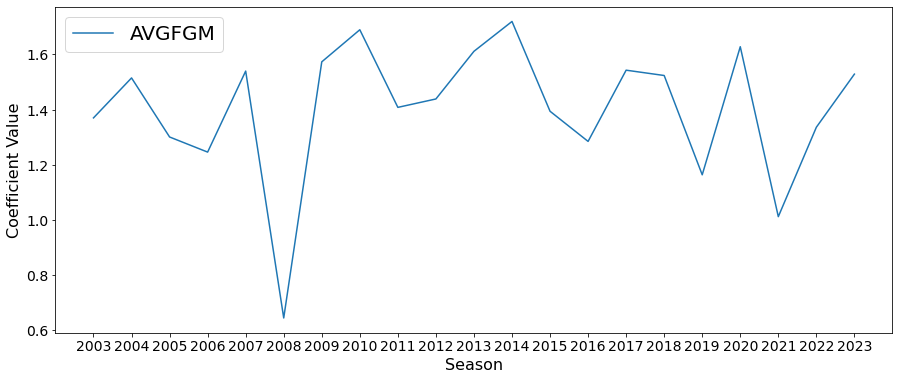

In [4]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

statsToMeasure = ["FGM", "FGA", "FGM3", "FGA3", "FTM", "FTA", "OR", "DR", "Ast", "TO", "Stl", "Blk", "PF"]
statsMeasured = ["AVG" + stat for stat in statsToMeasure]
statsMeasured = statsMeasured + ["O" + stat for stat in statsMeasured]
statsMeasured = statsMeasured + ["RAT" + stat for stat in statsToMeasure]

teams = df["TeamID"].unique()
seasons = df["Season"].unique()

seasons = np.arange(2003,2024)

predictedWins = np.zeros(len(seasons))
coeffs = pd.DataFrame(columns = statsMeasured)


for i, season in enumerate(seasons):
    seasonStatsMod = df.loc[df["AVGFGA3"] != 0]
    seasonStatsMod = seasonStatsMod.loc[seasonStatsMod["Season"] == season]
    seasonStatsMod = seasonStatsMod.loc[df["AVGFGA3"] != -1]
    # seasonStatsMod = seasonStatsMod.loc[seasonStatsMod["TeamID"] != 1181]
    X = seasonStatsMod[statsMeasured].to_numpy()
    #X = StandardScaler().fit_transform(X)
    y = seasonStatsMod["GamesWon"].to_numpy()
    
    reg = linear_model.LassoCV(cv=5, random_state=0, max_iter = 1000000).fit(X, y)
    
    # Duke = df.loc[df["TeamID"] == 1183]
    # Duke = Duke.loc[Duke["Season"] == season]
    # Duke = Duke[statsMeasured].to_numpy()
    # predictedWins[i] = reg.predict(Duke)
    
    coeffs.loc[len(coeffs)] = reg.coef_
    print(reg.score(X, y))
    
    


fig, ax = plt.subplots(figsize=(15, 6))



# statsToPlot = ["AVGFGM","AVGOR", "AVGFGA3", "RATFTA", "OAVGFGM" ]
statsToPlot = ["AVGFGM"]
ax.plot(seasons, coeffs[statsToPlot])

# ax.plot(seasons, predictedWins)
# ax.plot(seasons, actualWins)

ax.set_xticks(seasons)

#ax.set_title("Duke AVGFGA3 importance", size=20)
ax.set_xlabel("Season", size=16)
ax.set_ylabel("Coefficient Value", size=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(statsToPlot, fontsize=20)

plt.savefig("./plots/three.png",dpi=200)
plt.show()


actualWins = df.loc[df["TeamID"] == 1183, "GamesWon"]



0.8964371499235461
0.8879997468450072
0.8924045044319342
0.8863986526939234
0.8974619343602019
0.9061866424139214
0.8847705650831105
0.9221437295160266
0.8867739982762602
0.9157318987188671
0.8998759084099712
0.8863237378135855
0.9164999840398583
0.9064881205764955
0.896164422722115
0.9069240623009909
0.9028952749262473
0.8970264240584407
0.78212167023778
0.8973926228428453
0.9001256758882286


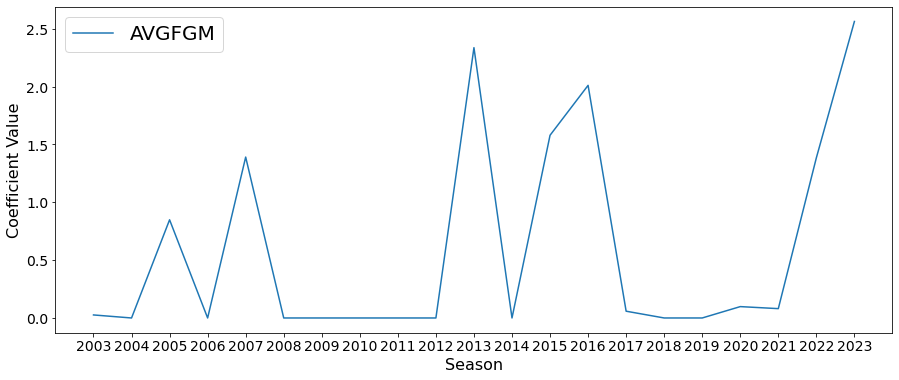

In [5]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

statsToMeasure = ["FGM", "FGA", "FGM3", "FGA3", "FTM", "FTA", "OR", "DR", "Ast", "TO", "Stl", "Blk", "PF"]
statsMeasured = ["AVG" + stat for stat in statsToMeasure]
statsMeasured = statsMeasured + ["O" + stat for stat in statsMeasured]
statsMeasured = statsMeasured + ["RAT" + stat for stat in statsToMeasure]

teams = df["TeamID"].unique()
seasons = df["Season"].unique()

seasons = np.arange(2003,2024)

predictedWins = np.zeros(len(seasons))
coeffs = pd.DataFrame(columns = statsMeasured)


for i, season in enumerate(seasons):
    seasonStatsMod = df.loc[df["AVGFGA3"] != 0]
    seasonStatsMod = seasonStatsMod.loc[seasonStatsMod["Season"] == season]
    seasonStatsMod = seasonStatsMod.loc[df["AVGFGA3"] != -1]
    # seasonStatsMod = seasonStatsMod.loc[seasonStatsMod["TeamID"] != 1181]
    X = seasonStatsMod[statsMeasured].to_numpy()
    X = StandardScaler().fit_transform(X)
    y = seasonStatsMod["GamesWon"].to_numpy()
    
    reg = linear_model.LassoCV(cv=5, random_state=0, max_iter = 1000000).fit(X, y)
    
    # Duke = df.loc[df["TeamID"] == 1183]
    # Duke = Duke.loc[Duke["Season"] == season]
    # Duke = Duke[statsMeasured].to_numpy()
    # predictedWins[i] = reg.predict(Duke)
    
    coeffs.loc[len(coeffs)] = reg.coef_
    print(reg.score(X, y))
    
    


fig, ax = plt.subplots(figsize=(15, 6))



# statsToPlot = ["AVGFGM","AVGOR", "AVGFGA3", "RATFTA", "OAVGFGM" ]
statsToPlot = ["AVGFGM"]
ax.plot(seasons, coeffs[statsToPlot])

# ax.plot(seasons, predictedWins)
# ax.plot(seasons, actualWins)

ax.set_xticks(seasons)

#ax.set_title("Duke AVGFGA3 importance", size=20)
ax.set_xlabel("Season", size=16)
ax.set_ylabel("Coefficient Value", size=16)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(statsToPlot, fontsize=20)

plt.savefig("./plots/three.png",dpi=200)
plt.show()


actualWins = df.loc[df["TeamID"] == 1183, "GamesWon"]



In [90]:
coeffs

AVGFGM   AVGFGA   AVGFGM3   AVGFGA3    AVGFTM    AVGFTA     AVGOR  \
0   0.026189 -0.00000  0.000000 -0.000000  0.246493  0.203573 -0.000000   
1   0.000000  0.00000  0.055582  0.000000  0.000000  0.000000  0.000000   
2   0.848673  0.00000  0.942749 -0.000000  0.150456  0.000000  0.141704   
3   0.000000 -0.00000  0.014213  0.000000  0.129707  0.000000  0.000000   
4   1.390844  0.00000  1.034070 -0.000000  0.934657  0.000000 -0.000000   
5   0.000000  0.00000  0.000000  0.000000  0.068224  0.110419 -0.000000   
6   0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.071602   
7   0.000000 -0.00000  0.813532  0.172670  0.490918  0.139109  0.056192   
8   0.000000  0.00000  0.000000  0.178614  0.000000  0.000000  0.000000   
9   0.000000  0.00000  1.246773  0.000000  1.265202  0.120875  0.052174   
10  2.336610 -0.00000  0.345519  0.000000  0.253092 -0.000000 -0.453497   
11  0.000000 -0.00000  0.763773  0.000000  0.000000  0.414717 -0.000000   
12  1.579330 -0.64182  3.114935 -0.651757  0.526642  0.000000  0.000000   
13  2.010728  0.00000  1.228004 -0.000000  0.428109  0.000000 -0.000000   
14  0.058526  0.00000  0.004094  0.000000  0.000000  0.005186  0.000000   
15  0.000000 -0.00000  0.615182  0.165709  0.136385  0.169614 -0.000000   
16  0.000000 -0.00000  0.892115  0.000000  1.433645  0.002740  0.218727   
17  0.098268  0.00000  0.375417  0.000000  0.101860  0.262076  0.000000   
18  0.080693  0.00000  0.633641  0.000000  0.000000  0.000000  0.083188   
19  1.384661  0.00000  1.070064  0.000000  0.825038  0.000000  0.000000   
20  2.563016  0.00000  1.199911 -0.586666  0.870840  0.000000  0.000000   

       AVGDR    AVGAst     AVGTO  ...   RATFGA3    RATFTM    RATFTA     RATOR  \
0   0.000000 -0.000000 -0.000000  ... -0.000000  0.980461  0.320279 -0.000000   
1   0.239269  0.000000 -0.030987  ...  0.000000  2.425687  0.000000 -0.000000   
2   0.577524  0.075248 -0.407310  ... -0.000000  1.824282  0.000000  0.000000   
3   0.000000 -0.000000 -0.000000  ...  0.000000  1.824235  0.000000 -0.000000   
4   0.684240 -0.000000 -0.000000  ... -0.100891  0.729732  0.000000 -0.005414   
5   0.005181  0.000000 -0.000000  ... -0.258594  1.438212  0.000000 -0.025131   
6   0.000000  0.000000 -0.000000  ...  0.000000  2.528200  0.043378  0.000000   
7   0.268955 -0.000000 -0.000000  ...  0.000000  1.773341  0.003975  0.000000   
8   0.229839 -0.000000 -0.358947  ... -0.000000  2.177461  0.000000  0.000000   
9   0.000000 -0.042401 -0.278319  ... -0.066462  0.051510  0.967536  0.000000   
10 -0.000000 -0.030652 -1.729168  ...  0.606893  1.612656 -0.644473  0.803284   
11  0.000000  0.000000 -0.000000  ...  0.000000  1.765616  0.000000 -0.070524   
12  0.000000  0.068456 -0.901456  ... -0.000000  1.263459 -0.000000  0.481312   
13  0.433346 -0.000000 -0.000000  ... -0.161022  0.993012  0.476214  0.000000   
14  0.000000  0.000000 -0.000000  ...  0.000000  1.661783  0.406698  0.000000   
15  0.038116  0.101389 -0.047999  ...  0.000000  1.434412  0.000000 -0.000000   
16  0.145124  0.081330 -1.230218  ... -0.000000  0.000000 -0.000000  0.904260   
17  0.000000 -0.000000 -0.000000  ...  0.000000  1.750834  0.000000  0.000000   
18  0.000000  0.000000 -0.119063  ...  0.000000  1.592193  0.000000  0.000000   
19  0.331183  0.141816 -0.507123  ... -0.000000  1.095199  0.000000 -0.000000   
20 -0.020726  0.077843 -0.581670  ... -0.000000  0.790908  0.217364  0.122858   

       RATDR    RATAst     RATTO    RATStl    RATBlk     RATPF  
0   1.664697  0.000000 -0.946136  0.352699  0.000000 -0.328986  
1   0.113051  0.034948 -0.372264  0.000000  0.067650 -0.000000  
2   0.245544  0.000000 -0.000000  0.259191 -0.000000  0.000000  
3   0.614897  0.000000 -0.862832  0.000000  0.000000 -0.348118  
4   0.000000 -0.111185 -0.781933 -0.298600  0.999088 -0.372525  
5   1.465986  0.322764 -1.090734  0.168912  0.000000 -0.372407  
6   0.000000  0.000000 -0.223509  0.000000  0.029528 -0.000000  
7   0.052218  0.195659 -0.237330 -0.000000 -0.246606

In [91]:
reg.alpha_

0.010642346651323426

In [92]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from random import randint
df = pd.read_csv("./seasonStats.csv")

df = df.loc[(df['Season'] >= 2003) & (df['Season'] <= 2023) & (df["HighDay"] >= -1)] 
df = df[df["AVGFGA"] != -1]

selected = ["AVGFGM", "AVGFGM3", "AVGFTM", "OAVGFGM", "OAVGFGM3", "OAVGFTM"]
x = df.loc[:, ["AVGFGM", "AVGFGM3", "AVGFTM", "OAVGFGM", "OAVGFGM3", "OAVGFTM"]].values
y = df.loc[:,['HighDay']].values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=6)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ["pc1", "pc2", "pc3", "pc4", "pc5", "pc6"])


df.reset_index(inplace=True)

principalDf["HighDay"] = df["HighDay"]
principalDf["GamesWon"] = df["GamesWon"]
principalDf["TeamID"] = df["TeamID"]

principalDf.loc[(principalDf["GamesWon"] >= 0) & (principalDf["GamesWon"] <=10), "GamesWon"] = 10
principalDf.loc[(principalDf["GamesWon"] >= 11) & (principalDf["GamesWon"] <=20), "GamesWon"] = 20
principalDf.loc[(principalDf["GamesWon"] >= 21) & (principalDf["GamesWon"] <= 30), "GamesWon"] = 30
principalDf.loc[(principalDf["GamesWon"] >= 31) , "GamesWon"] = 40

print("PCA 1:")
for combo in zip(pca.components_[0], selected):
    print(f"{combo[1]:} {combo[0]}")
 
print()

print("PCA 3:")
for combo in zip(pca.components_[2], selected):
    print(f"{combo[1]:} {combo[0]}")
    

PCA 1:
AVGFGM 0.48890550867091126
AVGFGM3 0.4777565217198709
AVGFTM 0.049740530409771194
OAVGFGM 0.529994750678111
OAVGFGM3 0.48150247498926835
OAVGFTM -0.13231371815793994

PCA 3:
AVGFGM -0.5062595755367488
AVGFGM3 -0.29738445790017176
AVGFTM -0.25957240380288754
OAVGFGM 0.4041958196288461
OAVGFGM3 0.5043679232437568
OAVGFTM 0.4124616721079758


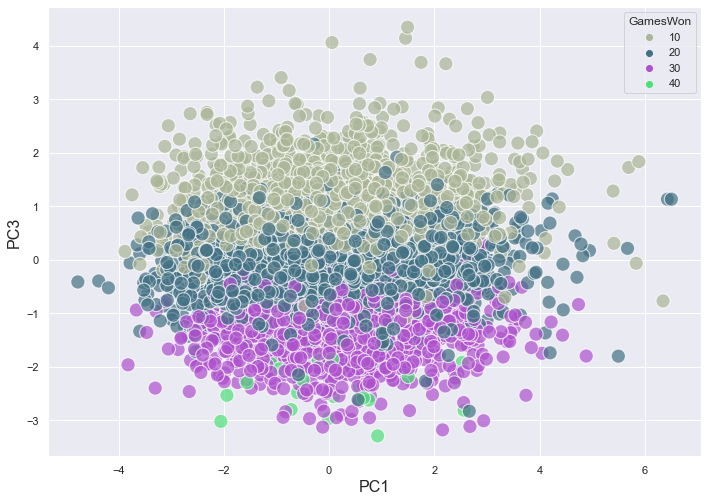

In [93]:
import random
colors = []
n = 4
random.seed(35)
for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.scatterplot(data=principalDf, x="pc1", y = "pc3", hue="GamesWon", palette=colors, s=200, alpha=0.7)

ax.set_xlabel("PC1", size=16)
ax.set_ylabel("PC3", size=16)

plt.savefig("./plots/pca.png",dpi=200)

plt.show()

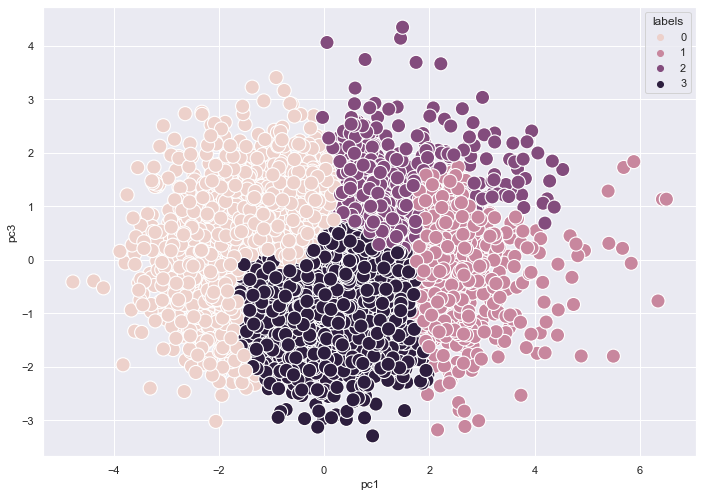

In [94]:
from sklearn.cluster import Birch
pcs = ["pc1", "pc3"]

brc = Birch(n_clusters=4)
brc.fit(principalDf[pcs])
labels = brc.predict(principalDf[pcs])
principalDf["labels"] = labels

fig, ax = plt.subplots()

sns.scatterplot(data=principalDf, x=pcs[0], y=pcs[1], hue="labels", s=200)

plt.show()

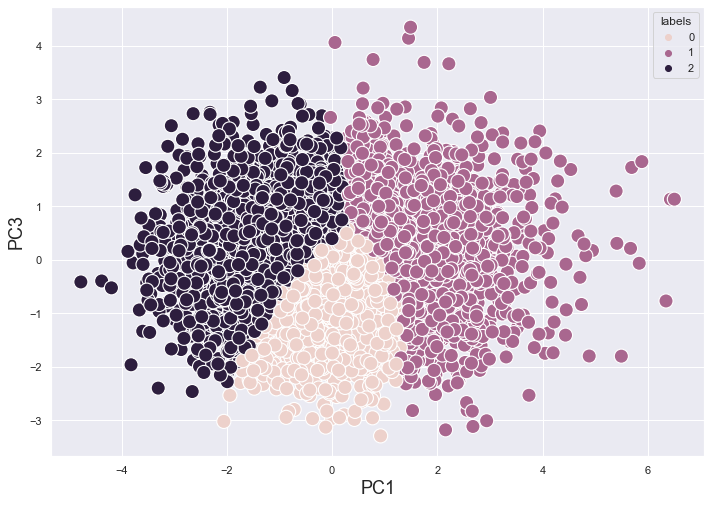

In [95]:
from sklearn.mixture import GaussianMixture
pcs = ["pc1", "pc3"]

gm = GaussianMixture(n_components=3)
gm.fit(principalDf[pcs])
labels = gm.predict(principalDf[pcs])
principalDf["labels"] = labels

fig, ax = plt.subplots()

sns.scatterplot(data=principalDf, x=pcs[0], y=pcs[1], hue="labels", s=200)
ax.set_xlabel("PC1", size=18)
ax.set_ylabel("PC3", size=18)

plt.savefig("./plots/gaussian.png", dpi=200)
plt.show()

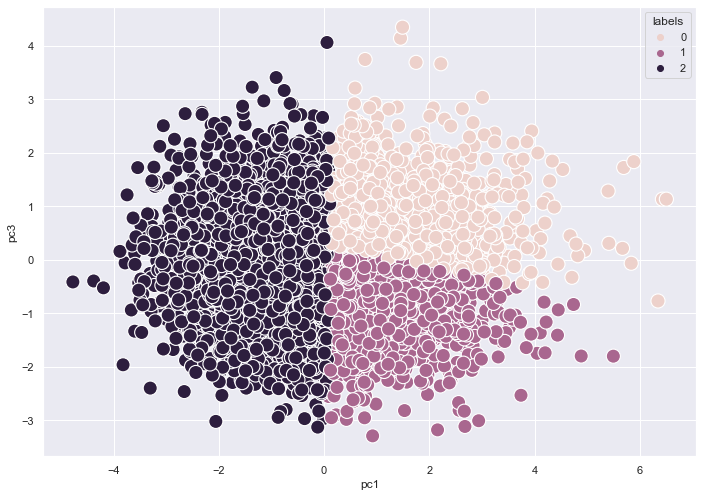

In [96]:
from sklearn.cluster import BisectingKMeans
pcs = ["pc1", "pc3"]

bkm = BisectingKMeans(n_clusters=3)
bkm.fit(principalDf[pcs])
labels = bkm.predict(principalDf[pcs])
principalDf["labels"] = labels

fig, ax = plt.subplots()

sns.scatterplot(data=principalDf, x=pcs[0], y=pcs[1], hue="labels", s=200)

plt.show()

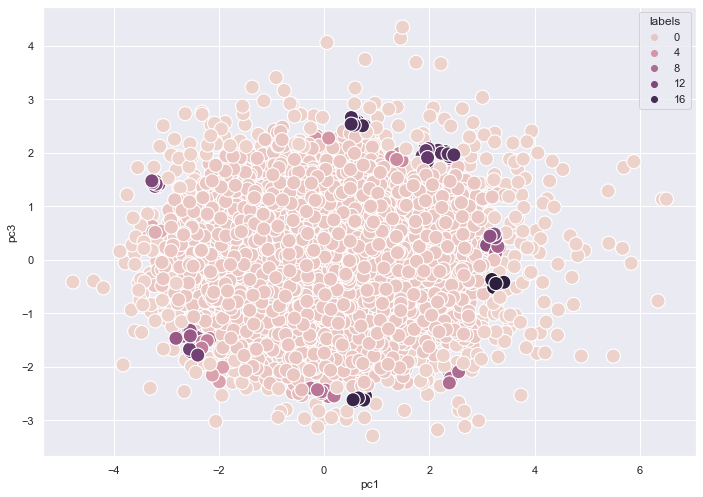

In [97]:
from sklearn.cluster import DBSCAN
pcs = ["pc1", "pc3"]

db = DBSCAN(eps=0.15)
db.fit(principalDf[pcs])
labels = db.labels_
principalDf["labels"] = labels

fig, ax = plt.subplots()

sns.scatterplot(data=principalDf, x=pcs[0], y=pcs[1], hue="labels", s=200)

plt.show()

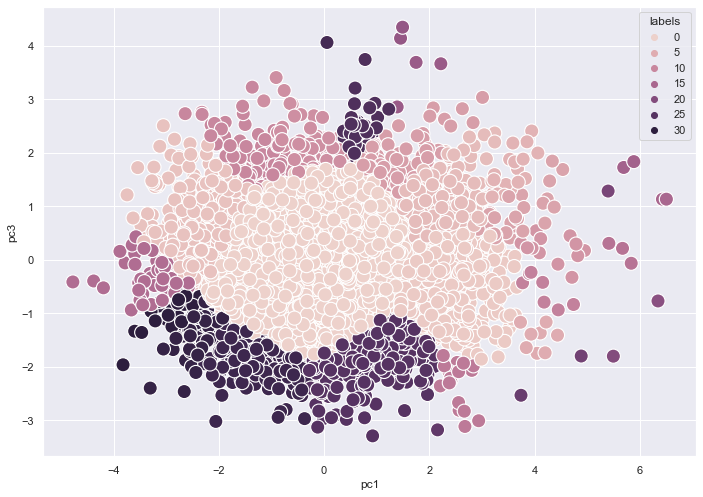

In [98]:
from sklearn.cluster import MeanShift
pcs = ["pc1", "pc3"]

ms = MeanShift(bandwidth=0.5)
ms.fit(principalDf[pcs])
labels = ms.labels_
principalDf["labels"] = labels

fig, ax = plt.subplots()

sns.scatterplot(data=principalDf, x=pcs[0], y=pcs[1], hue="labels", s=200)

plt.show()

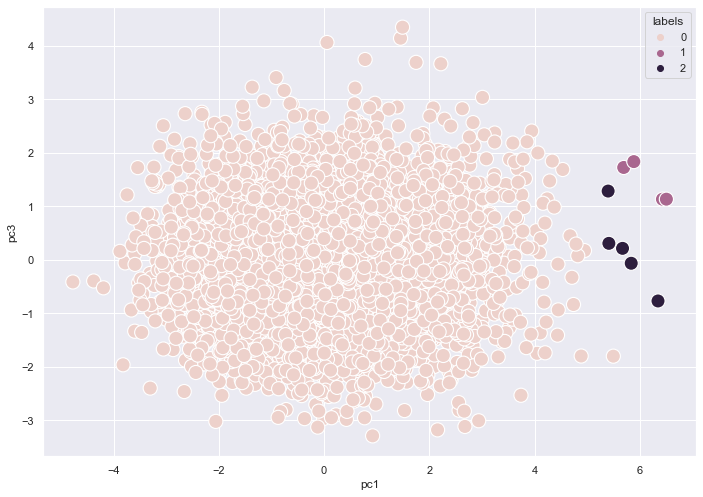

In [99]:
from sklearn.cluster import SpectralClustering
pcs = ["pc1", "pc3"]

sc = SpectralClustering(n_clusters=3)
sc.fit(principalDf[pcs])
labels = sc.labels_
principalDf["labels"] = labels

fig, ax = plt.subplots()

sns.scatterplot(data=principalDf, x=pcs[0], y=pcs[1], hue="labels", s=200)

plt.show()

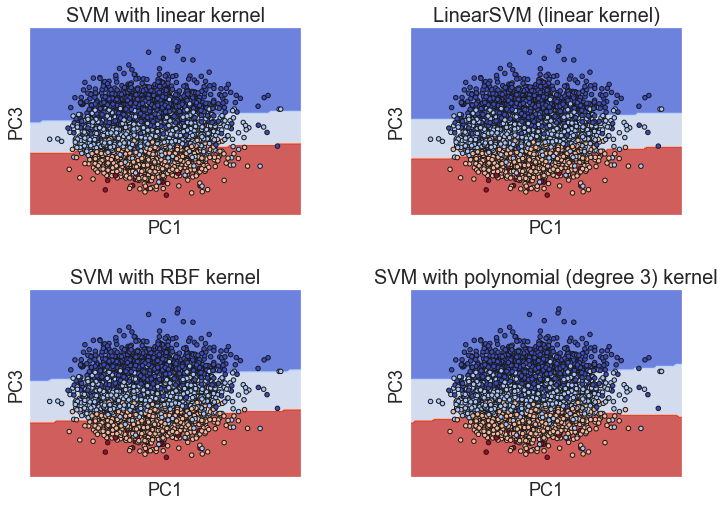

In [100]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay

# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = np.array(principalDf[["pc1", "pc3"]])
y = np.array(principalDf["GamesWon"])

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1 # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.001, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVM with linear kernel",
    "LinearSVM (linear kernel)",
    "SVM with RBF kernel",
    "SVM with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel="pc1",
        ylabel="pc3",
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_xlabel("PC1", size = 18)
    ax.set_ylabel("PC3", size = 18)
    ax.set_title(title, size = 20)

plt.savefig("./plots/svm.png")
plt.show()

In [101]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import seaborn as sns
from random import randint

statsToMeasure = ["FGM", "FGA", "FGM3", "FGA3", "FTM", "FTA", "OR", "DR", "Ast", "TO", "Stl", "Blk", "PF"]
averageStats = ["AVG" + stat for stat in statsToMeasure]
oAverageStats = ["O" + stat for stat in averageStats]
ratStats = ["RAT" + stat for stat in statsToMeasure]

allStats = averageStats + oAverageStats + ratStats

df = pd.read_csv("./seasonStats.csv")

df_mod = df.loc[((df['Season'] >= 2003) & (df['Season'] <= 2023)) & (df["HighDay"] >= -1)] 

df_mod = df_mod.loc[df_mod["AVGFGA"] > 0]



# selected = ["AVGFGM", "AVGFGM3", "AVGFTM", "OAVGFGM", "OAVGFGM3", "OAVGFTM"]
x = df_mod.loc[:, ratStats].values

x = StandardScaler().fit_transform(x)

pca = PCA(n_components=6)
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ["pc1", "pc2", "pc3", "pc4", "pc5", "pc6"])

df_mod.reset_index(inplace=True)

principalDf["GamesWon"] = df_mod["GamesWon"]
principalDf["TeamID"] = df_mod["TeamID"]

principalDf.loc[(principalDf["GamesWon"] >= 0) & (principalDf["GamesWon"] <=10), "GamesWon"] = 10
principalDf.loc[(principalDf["GamesWon"] >= 11) & (principalDf["GamesWon"] <=20), "GamesWon"] = 20
principalDf.loc[(principalDf["GamesWon"] >= 21) & (principalDf["GamesWon"] <= 30), "GamesWon"] = 30
principalDf.loc[(principalDf["GamesWon"] >= 31) , "GamesWon"] = 40

print("PCA 1:")
for combo in zip(pca.components_[0], df_mod.columns):
    print(f"{combo[1]:} {combo[0]}")
 
print()

print("PCA 2:")
for combo in zip(pca.components_[1], df_mod.columns):
    print(f"{combo[1]:} {combo[0]}")


PCA 1:
index 0.3614927569864813
Unnamed: 0 -0.02669895961579274
Season 0.08751548246535945
TeamID -0.04391729046125274
GamesWon 0.4057493399564246
HighDay 0.40349973164328423
AVGFGM 0.14028068226807222
AVGFGA 0.3915317237559092
AVGFGM3 0.3526977637062889
AVGFGA3 -0.15351684525709697
AVGFTM 0.15538504032537095
AVGFTA 0.23711996713043837
AVGOR -0.3609274434329318

PCA 2:
index 0.2703743145396365
Unnamed: 0 0.46644818286621326
Season 0.3063655791141603
TeamID 0.3184464593437039
GamesWon -0.2084599441214265
HighDay -0.22437659829086606
AVGFGM 0.1495045334613064
AVGFGA -0.13644028432595054
AVGFGM3 0.20100130323539628
AVGFGA3 -0.390097146227421
AVGFTM 0.3665643018257849
AVGFTA 0.017120864020618135
AVGOR 0.22814036375107244


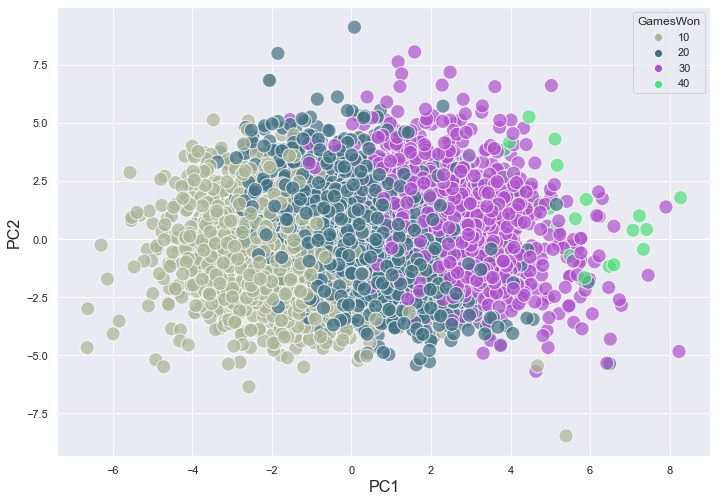

In [102]:
import random
colors = []
n = 4
random.seed(35)
for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

sns.set(rc={'figure.figsize':(11.7,8.27)})

ax = sns.scatterplot(data=principalDf, x="pc1", y = "pc2", hue="GamesWon", palette=colors, s=200, alpha=0.7)

ax.set_xlabel("PC1", size=16)
ax.set_ylabel("PC2", size=16)

plt.savefig("./plots/pca2.png",dpi=200)

plt.show()

In [103]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

statsToMeasure = ["FGM", "FGA", "FGM3", "FGA3", "FTM", "FTA", "OR", "DR", "Ast", "TO", "Stl", "Blk", "PF"]
#statsMeasured = ["AVG" + stat for stat in statsToMeasure]
#statsMeasured = statsMeasured + ["O" + stat for stat in statsMeasured]
statsMeasured = ["RAT" + stat for stat in statsToMeasure]

teams = df["TeamID"].unique()
seasons = df["Season"].unique()

seasons = np.arange(2003,2024)

predictedWins = np.zeros(len(seasons))
coeffs = pd.DataFrame(columns = statsMeasured)


for i, season in enumerate(seasons):
    seasonStatsMod = df.loc[df["AVGFGA3"] != 0]
    seasonStatsMod = seasonStatsMod.loc[seasonStatsMod["Season"] == season]
    seasonStatsMod = seasonStatsMod.loc[df["AVGFGA3"] != -1]
    # seasonStatsMod = seasonStatsMod.loc[seasonStatsMod["TeamID"] != 1181]
    X = seasonStatsMod[statsMeasured].to_numpy()
    #X = StandardScaler().fit_transform(X)
    y = seasonStatsMod["GamesWon"].to_numpy()
    
    reg = linear_model.LassoCV(cv=5, random_state=0, max_iter = 1000000).fit(X, y)
    
    # Duke = df.loc[df["TeamID"] == 1183]
    # Duke = Duke.loc[Duke["Season"] == season]
    # Duke = Duke[statsMeasured].to_numpy()
    # predictedWins[i] = reg.predict(Duke)
    
    coeffs.loc[len(coeffs)] = reg.coef_
    print(reg.score(X, y))
    
    


#fig, ax = plt.subplots(figsize=(15, 6))



# statsToPlot = ["AVGFGM","AVGOR", "AVGFGA3", "RATFTA", "OAVGFGM" ]
# statsToPlot = ["RATAVGFGM"]
# ax.plot(seasons, coeffs[statsToPlot])

# # ax.plot(seasons, predictedWins)
# # ax.plot(seasons, actualWins)

# ax.set_xticks(seasons)

# #ax.set_title("Duke AVGFGA3 importance", size=20)
# ax.set_xlabel("Season", size=16)
# ax.set_ylabel("Coefficient Value", size=16)

# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)

# plt.legend(statsToPlot, fontsize=20)

# plt.savefig("./plots/three.png",dpi=200)
# plt.show()


0.8933844563672907
0.8855334190973067
0.8806103279811393
0.8855381568782146
0.8792139494147337
0.9041476309579054
0.8921145595689055
0.91127796528869
0.8856744278127351
0.9044620768231959
0.8783561215573535
0.8832807693547721
0.8945577133245598
0.8929541254810401
0.8962911925588585
0.9014107780942089
0.8934574192398322
0.8907305123455084
0.7684622053489842
0.8867632931768381
0.8877297749286576


In [104]:
coeffs.mean()

RATFGM     29.740919
RATFGA     -4.422229
RATFGM3     5.592791
RATFGA3    -0.835263
RATFTM      9.082551
RATFTA      0.699680
RATOR       0.569928
RATDR       8.012291
RATAst      0.445522
RATTO      -5.475040
RATStl      0.821908
RATBlk      0.401818
RATPF      -1.399745
dtype: float64

In [105]:
df

Unnamed: 0  Season  TeamID  GamesWon  HighDay     AVGFGM     AVGFGA  \
0              0       0       0         0        0   0.000000   0.000000   
1              1    2003    1104        17        1  24.035714  57.178571   
2              2    2004    1104        17        4  24.896552  55.000000   
3              3    2005    1104        23        1  25.366667  52.666667   
4              4    2006    1104        17        2  24.517241  54.068966   
...          ...     ...     ...       ...      ...        ...        ...   
7724        7724    2019    1473         0       -1  -1.000000  -1.000000   
7725        7725    2020    1473         0       -1  -1.000000  -1.000000   
7726        7726    2021    1473         0       -1  -1.000000  -1.000000   
7727        7727    2022    1473         0       -1  -1.000000  -1.000000   
7728        7728    2023    1473         8       -1  24.206897  57.172414   

       AVGFGM3    AVGFGA3     AVGFTM  ...   RATFGA3    RATFTM    RATFTA  \
0     0.000000   0.000000   0.000000  ...  0.000000  0.000000  0.000000   
1     6.357143  19.857143  14.857143  ...  1.037313  1.223529  1.220833   
2     7.137931  18.620690  15.275862  ...  0.892562  1.121519  1.122124   
3     7.633333  19.566667  17.066667  ...  0.978333  1.802817  1.597254   
4     5.517241  16.241379  15.413793  ...  0.753600  1.590747  1.547677   
...        ...        ...        ...  ...       ...       ...       ...   
7724 -1.000000  -1.000000  -1.000000  ... -1.000000 -1.000000 -1.000000   
7725 -1.000000  -1.000000  -1.000000  ... -1.000000 -1.000000 -1.000000   
7726 -1.000000  -1.000000  -1.000000  ... -1.000000 -1.000000 -1.000000   
7727 -1.000000  -1.000000  -1.000000  ... -1.000000 -1.000000 -1.000000   
7728  7.379310  20.379310  11.827586  ...  0.819695  0.912234  0.863720   

         RATOR     RATDR    RATAst     RATTO    RATStl    RATBlk     RATPF  
0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1     1.245902  1.056782  1.036697  0.958763  1.193548  1.191011  0.936920  
2     0.982036  1.085803  1.045593  0.987179  1.289655  0.909091  0.909402  
3     0.887283  1.308072  1.121622  1.091954  0.891429  2.111111  0.741611  
4     1.025424  1.195286  0.910026  1.149560  0.943590  1.158730  0.746741  
...        ...       ...       ...       ...       ...       ...       ...  
7724 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000  
7725 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000  
7726 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000  
7727 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000 -1.000000  
7728  0.720000  0.899729  0.743056  1.080925  0.810427  1.125000  1.057778  

[7729 rows x 44 columns]